## Clustering Into Cells Types

In [1]:
from GSE239626.load_GSE239626 import load_GSE239626

genomic_matrix_df, gene_expression_df, antibody_capture_df, family_phenotype_df = load_GSE239626()

In [41]:
antibody_capture_df.head(1)

,ID,symbol,expression,AAACCCAAGACTGTTC-1,AAACCCAAGGATCATA-1,AAACCCAGTTATTCTC-1,AAACCCATCATGAGGG-1,AAACGAAAGCCAGTAG-1,AAACGAAAGCTGACAG-1,AAACGAAAGTAATACG-1,...,TTTGGTTAGCTTTCCC-20,TTTGGTTGTTTCGACA-20,TTTGGTTTCAGACCCG-20,TTTGGTTTCTCATAGG-20,TTTGGTTTCTGTAACG-20,TTTGTTGAGCGTCGAA-20,TTTGTTGAGTGTACCT-20,TTTGTTGCAATTGCAC-20,TTTGTTGCATTCAGCA-20,TTTGTTGGTGGGTTGA-20
36601,CCR4,CCR4_TotalSeqB,Antibody Capture,5,0,0,1,0,0,0,...,0,2,0,0,0,0,0,0,3,0


In [42]:
cells_seq = antibody_capture_df.columns[antibody_capture_df.columns.str.contains('-1$')]

In [43]:
cells_df = antibody_capture_df.iloc[:, antibody_capture_df.columns.str.contains('-1$')]

In [91]:
cells_df.head()

,AAACCCAAGACTGTTC-1,AAACCCAAGGATCATA-1,AAACCCAGTTATTCTC-1,AAACCCATCATGAGGG-1,AAACGAAAGCCAGTAG-1,AAACGAAAGCTGACAG-1,AAACGAAAGTAATACG-1,AAACGAAAGTATTCCG-1,AAACGAAAGTGCTACT-1,AAACGAAGTAACTAAG-1,...,TTTGGAGTCACTACTT-1,TTTGGTTAGCTGGCTC-1,TTTGGTTCAACGGCTC-1,TTTGGTTCATCGGCCA-1,TTTGTTGAGAGGGTCT-1,TTTGTTGAGCGGTAGT-1,TTTGTTGCACGCGTGT-1,TTTGTTGGTTAGGGTG-1,TTTGTTGGTTCTCGCT-1,TTTGTTGTCGATCCCT-1
36601,5,0,0,1,0,0,0,0,0,1,...,0,40,0,3,0,22,0,0,0,0
36602,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
36603,5,0,28,11,7,146,0,0,2,1,...,3,28,2,216,141,5,1,6,3,1
36604,2,3,0,3,0,4,1,2,2,0,...,6,2,5,2,4,0,0,8,1,2
36605,414,185,98,403,30,74,455,245,432,817,...,166,256,150,633,169,307,417,409,1052,883


In [93]:
import scanpy as sc
import pandas as pd

# Let's assume your dataframe is named 'cells_df'
# The gene identifiers (row indices) and cell barcodes (column names) will be used to construct the AnnData object
adata = sc.AnnData(X=cells_df.values.T, obs=pd.DataFrame(index=cells_df.columns), var=pd.DataFrame(index=cells_df.index))

/Users/nicolapitzalis/anaconda3/envs/chl/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [94]:
# Normalize the data (to counts per ten thousand, for instance)
sc.pp.normalize_total(adata, target_sum=1e4)

# Logarithmize the data
sc.pp.log1p(adata)

# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [95]:
# Run PCA
sc.tl.pca(adata, svd_solver='arpack')

# Compute the neighborhood graph
sc.pp.neighbors(adata)

# Run UMAP
sc.tl.umap(adata)

computing PCA
    with n_comps=5
    finished (0:00:00)
computing neighbors
    using data matrix X directly


/Users/nicolapitzalis/anaconda3/envs/chl/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
/Users/nicolapitzalis/anaconda3/envs/chl/lib/python3.9/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/Users/nicolapitzalis/anaconda3/envs/chl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:27)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


In [98]:
# Run Leiden clustering
sc.tl.leiden(adata)

running Leiden clustering


/var/folders/t9/fvrn7gpj7rq0k9s2312m36hh0000gn/T/ipykernel_99418/153262956.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


    finished: found 50 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [100]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


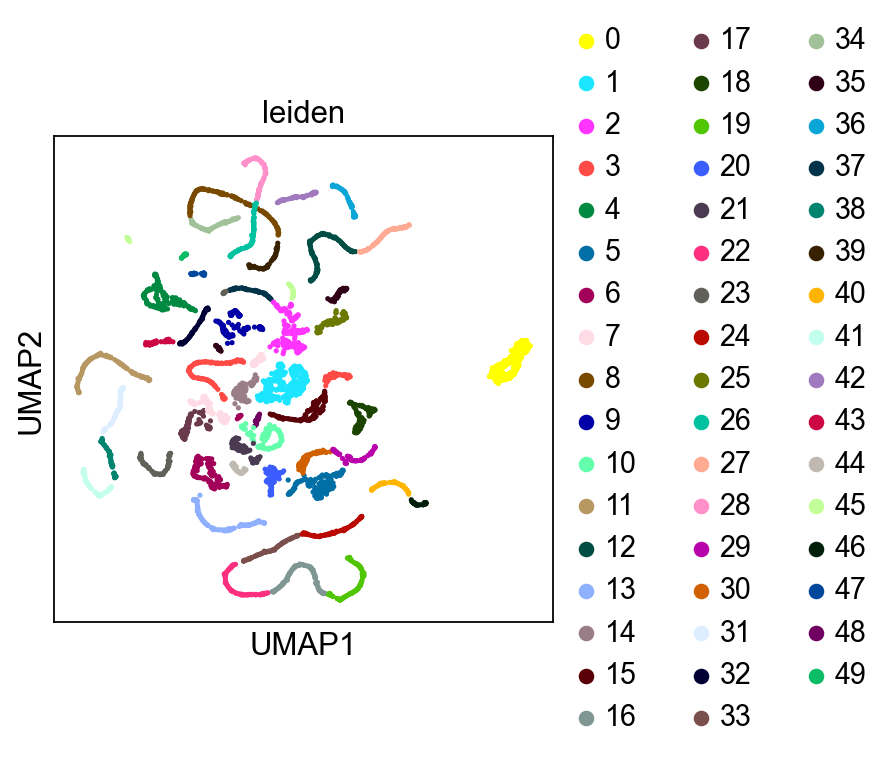

In [101]:
sc.pl.umap(adata, color='leiden')

In [102]:
sc.tl.tsne(adata)

computing tSNE
    using data matrix X directly
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:12)


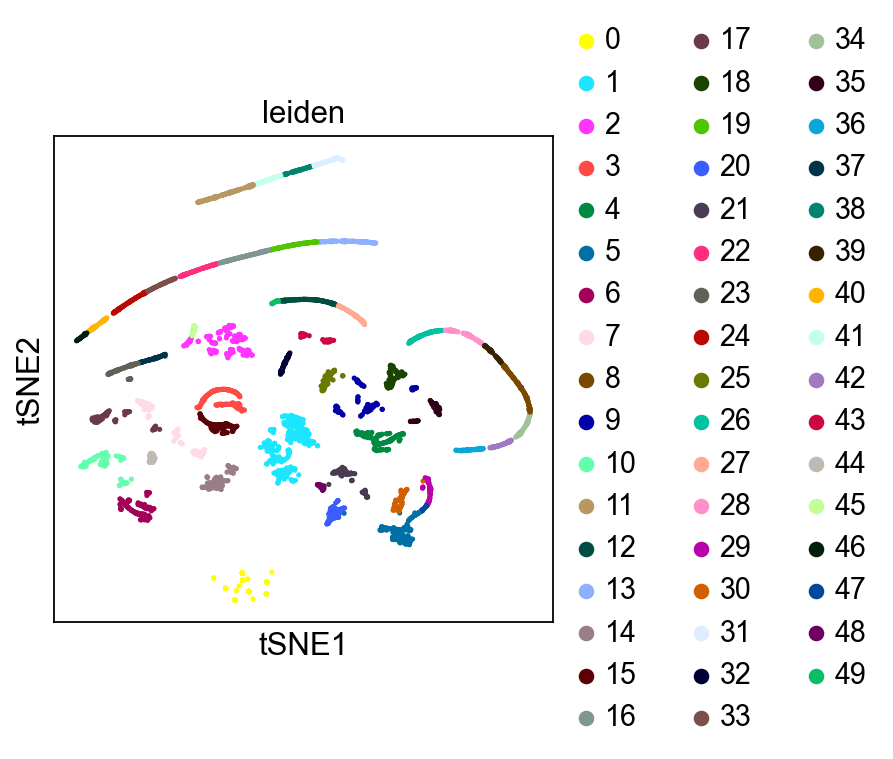

In [103]:
sc.pl.tsne(adata, color='leiden')

In [104]:
adata.obs

,leiden
AAACCCAAGACTGTTC-1,0
AAACCCAAGGATCATA-1,13
AAACCCAGTTATTCTC-1,0
AAACCCATCATGAGGG-1,26
AAACGAAAGCCAGTAG-1,4
...,...
TTTGTTGAGCGGTAGT-1,31
TTTGTTGCACGCGTGT-1,0
TTTGTTGGTTAGGGTG-1,0
TTTGTTGGTTCTCGCT-1,14


## Preprocessing and clustering PBMC (from .mtx)

In [105]:
import scanpy as sc
import numpy as np

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)                            

-----
anndata     0.10.7
scanpy      1.10.1
-----
GSE239626           NA
PIL                 10.3.0
appnope             0.1.4
asttokens           NA
backcall            0.2.0
certifi             2024.02.02
charset_normalizer  3.3.2
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0
debugpy             1.6.7
decorator           5.1.1
exceptiongroup      1.2.0
executing           2.0.1
h5py                3.11.0
idna                3.7
igraph              0.11.4
importlib_resources NA
ipykernel           6.29.3
jedi                0.19.1
joblib              1.4.0
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.42.0
matplotlib          3.8.4
matplotlib_inline   0.1.6
mpl_toolkits        NA
natsort             8.4.0
numba               0.59.1
numpy               1.26.4
packaging           24.0
pandas              2.2.2
parso               0.8.4
patsy               0.5.6
pexpect             

In [111]:
adata = sc.read_10x_mtx(
    'GSE239626/MTX/',            # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)                                # write a cache file for faster subsequent reading

... writing an h5ad cache file to speedup reading next time


In [107]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [108]:
adata

AnnData object with n_obs × n_vars = 72317 × 36601
    var: 'gene_ids', 'feature_types'

In [109]:
adata.var

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
AC141272.1,ENSG00000277836,Gene Expression
AC023491.2,ENSG00000278633,Gene Expression
AC007325.1,ENSG00000276017,Gene Expression
AC007325.4,ENSG00000278817,Gene Expression


normalizing counts per cell
    finished (0:00:01)


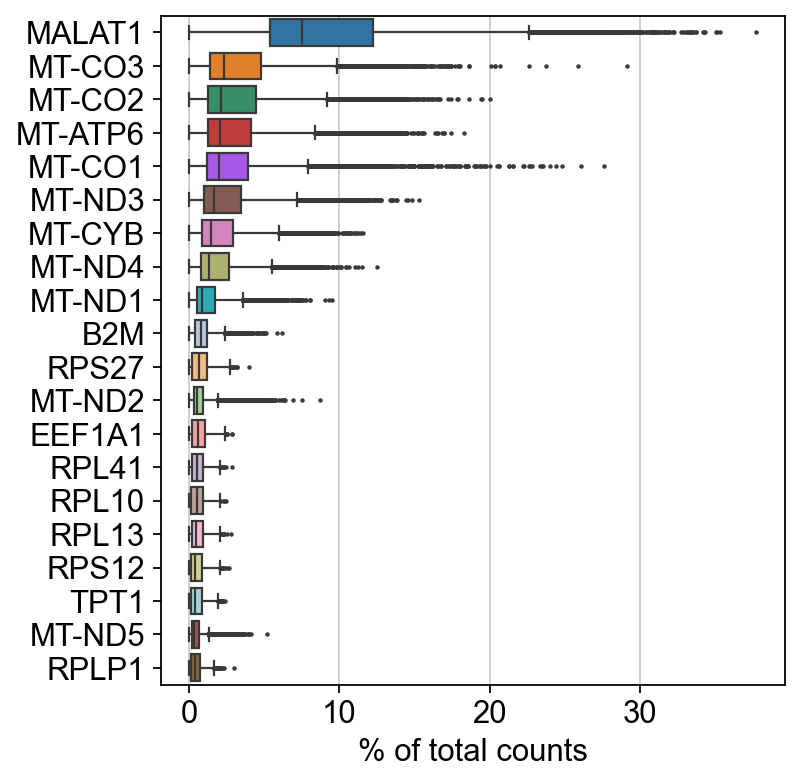

In [68]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [69]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 286 cells that have less than 200 genes expressed
filtered out 11150 genes that are detected in less than 3 cells


In [72]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

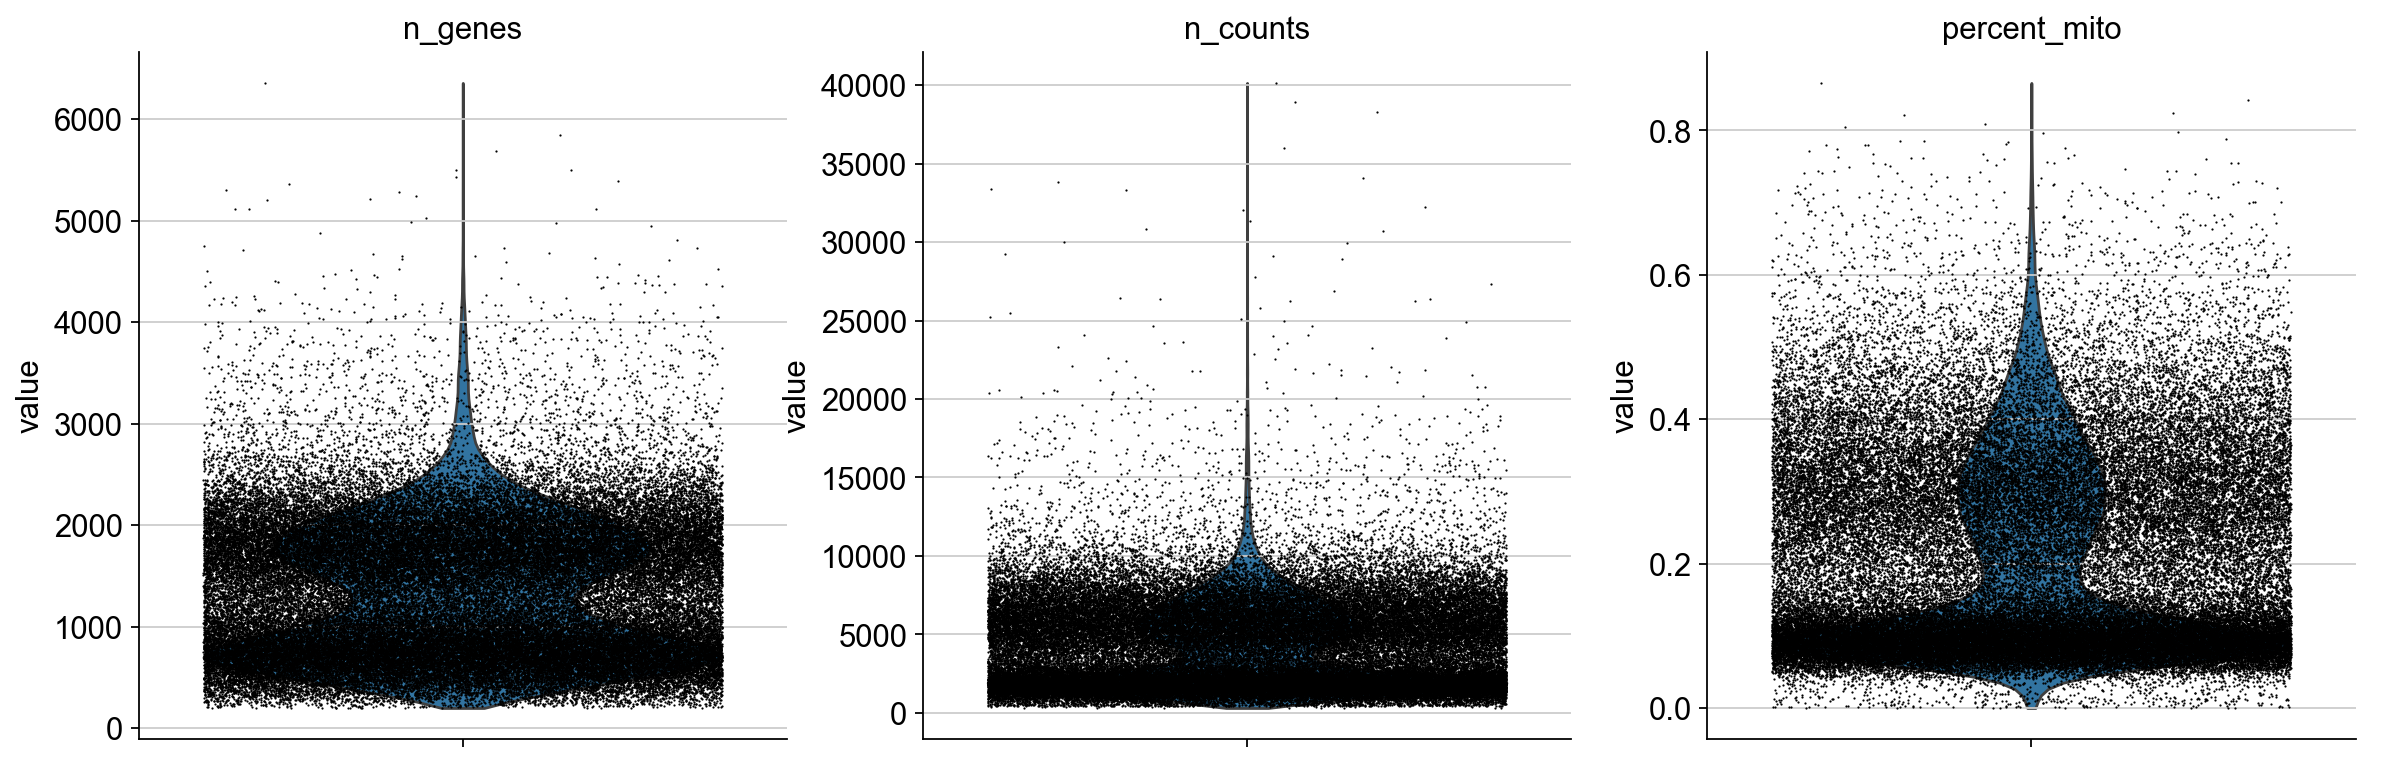

In [74]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)


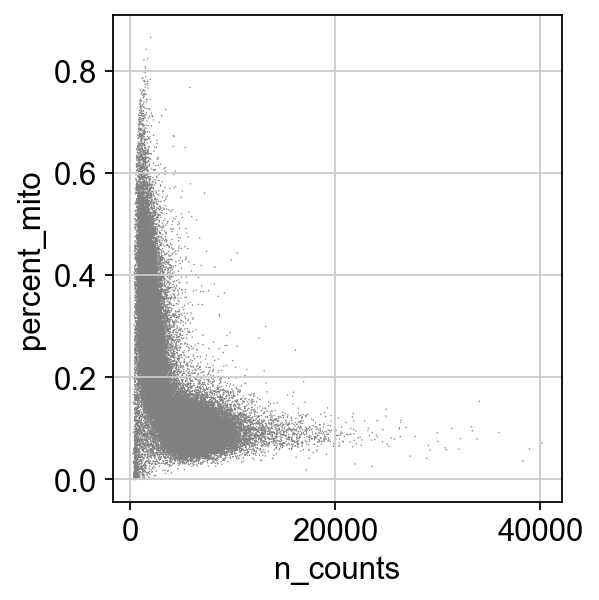

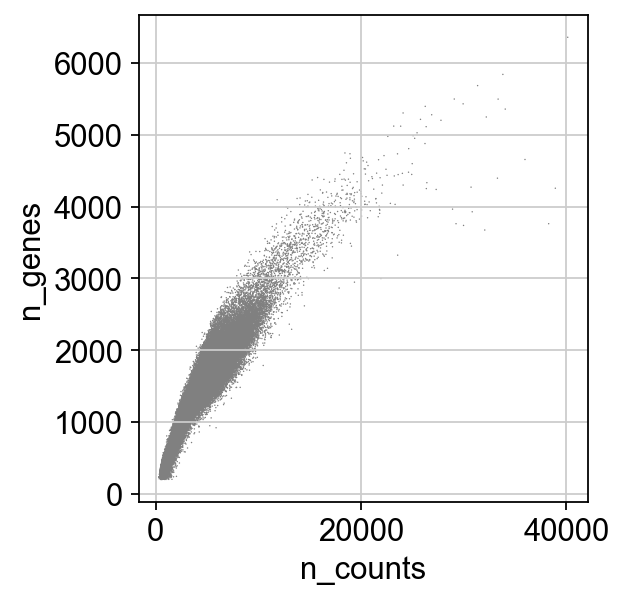

In [75]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [76]:
adata = adata[adata.obs.n_genes < 2500, :]
adata = adata[adata.obs.percent_mito < 0.05, :]

In [77]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/nicolapitzalis/anaconda3/envs/chl/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [78]:
sc.pp.log1p(adata)

In [79]:
adata.raw = adata

In [80]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


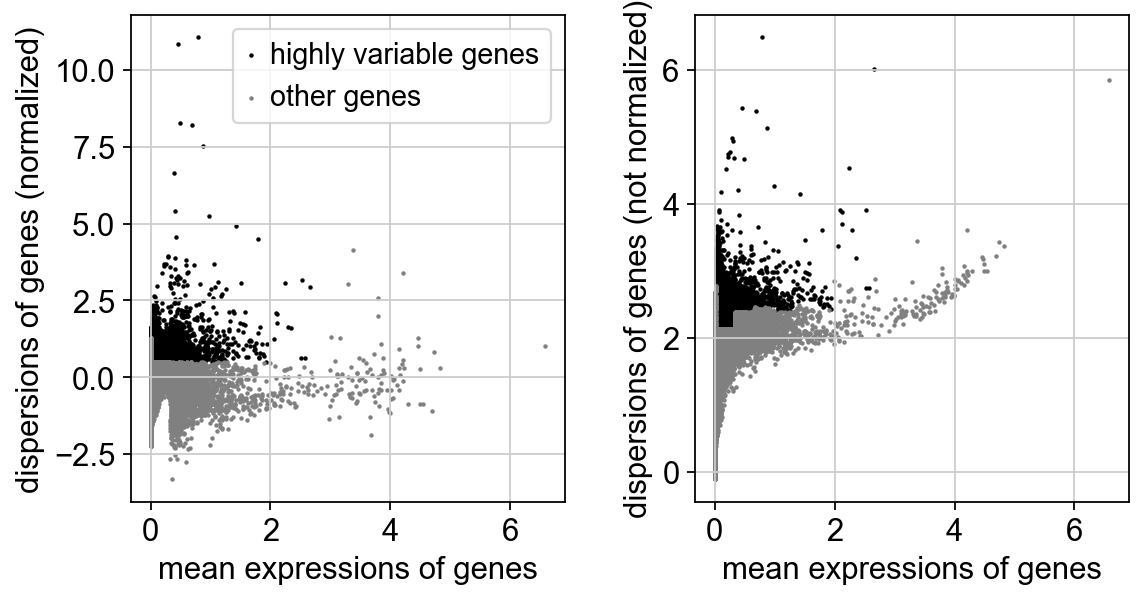

In [81]:
sc.pl.highly_variable_genes(adata)

In [82]:
adata = adata[:, adata.var.highly_variable]

In [83]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use


/Users/nicolapitzalis/anaconda3/envs/chl/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:641: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:24)


In [84]:
sc.pp.scale(adata, max_value=10)

### Principal Component Analysis

In [85]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:02)


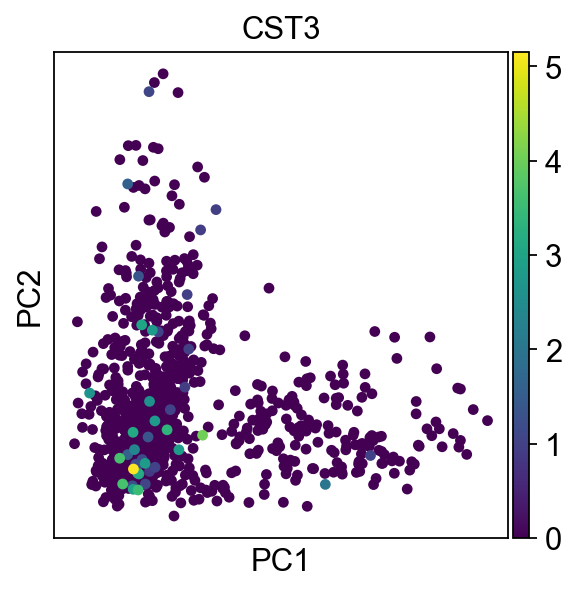

In [86]:
sc.pl.pca(adata, color='CST3')

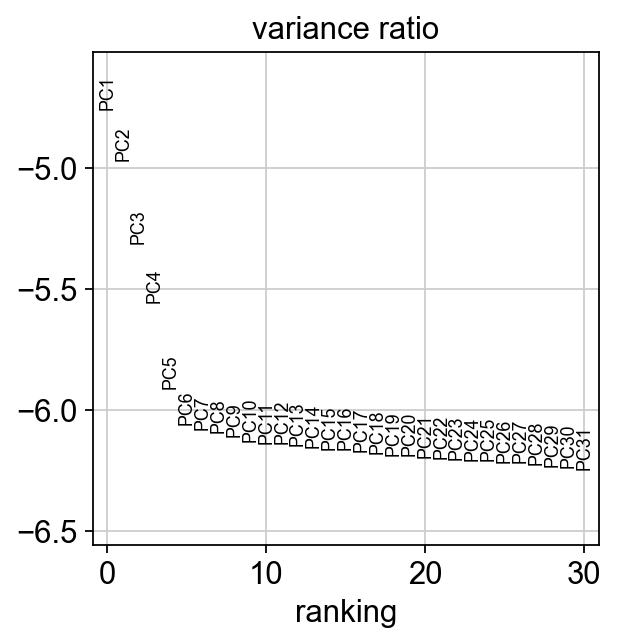

In [87]:
sc.pl.pca_variance_ratio(adata, log=True)